In [2]:
import sys
import xml.etree.ElementTree as ET
from collections import Counter
from pathlib import Path

import cv2
import matplotlib.pyplot as plt
from IPython.display import Video
import torch
import torchvision
from torchvision import transforms
from torchvision.io import read_image
from torchvision.transforms.functional import to_pil_image
from torchvision.utils import draw_bounding_boxes, make_grid

In [3]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("CV2 version : ", cv2.__version__)
print("torch version : ", torch.__version__)
print("torchvision version : ", torchvision.__version__)

Platform: win32
Python version: 3.11.4 (tags/v3.11.4:d2340ef, Jun  7 2023, 05:45:37) [MSC v.1934 64 bit (AMD64)]
---
CV2 version :  4.12.0
torch version :  2.7.1+cpu
torchvision version :  0.22.1+cpu


In [4]:
dhaka_image_dir = Path(r"D:\Projects\Traffic Monitoring in Dhaka using Deep learning\dataset\train")
print("Data directory:", dhaka_image_dir)

Data directory: D:\Projects\Traffic Monitoring in Dhaka using Deep learning\dataset\train


In [5]:
dhaka_files = list(dhaka_image_dir.iterdir())
dhaka_files[-5:]

[WindowsPath('D:/Projects/Traffic Monitoring in Dhaka using Deep learning/dataset/train/annotations'),
 WindowsPath('D:/Projects/Traffic Monitoring in Dhaka using Deep learning/dataset/train/images')]

In [6]:
file_extension_counts = Counter(Path(file).suffix for file in dhaka_files)

for extension, count in file_extension_counts.items():
    print(f"Files with extension {extension}: {count}")

Files with extension : 2


In [7]:
images_dir = dhaka_image_dir/"images"
annotations_dir = dhaka_image_dir / "annotations"

images_dir.mkdir(exist_ok=True)
annotations_dir.mkdir(exist_ok=True)

In [8]:
# for file in dhaka_files:
#     if file.suffix.lower() in (".jpg", ".jpeg", ".png"):
#         target_dir = images_dir
#     elif file.suffix.lower() == ".xml":
#         target_dir = annotations_dir
#     file.rename(target_dir / file.name)

In [9]:
images_files = list(images_dir.iterdir())
annotations_files = list(annotations_dir.iterdir())

assert len(images_files) == len(annotations_files)

In [10]:
xml_filepath = annotations_dir / "01.xml"


In [11]:
!head -n 25 $xml_filepath

'head' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
tree = ET.parse(xml_filepath)
root = tree.getroot()
print(root.tag)

annotation


In [13]:
width = int(root.find("size").find("width").text)
height = int(root.find("size").find("height").text)
print(f"image width: {width}  image height: {height}")

image width: 1200  image height: 800


In [14]:
bounding_boxes = []
labels = []
for obj in root.findall("object"):
    label = obj.find("name").text
    labels.append(label)
    bndbox = obj.find("bndbox")
    xmin = int(bndbox.find("xmin").text)
    ymin = int(bndbox.find("ymin").text)
    xmax = int(bndbox.find("xmin").text)
    ymax = int(bndbox.find("ymin").text)
    bounding_boxes.append([xmin, ymin, xmax, ymax])

for label, bounding_box in zip(labels, bounding_boxes):
    print(f"{label}: {bounding_box}")

bus: [833, 390, 833, 390]
bus: [901, 284, 901, 284]
bus: [909, 241, 909, 241]
rickshaw: [761, 413, 761, 413]
rickshaw: [777, 364, 777, 364]
rickshaw: [120, 351, 120, 351]
rickshaw: [178, 340, 178, 340]
rickshaw: [551, 229, 551, 229]
rickshaw: [849, 211, 849, 211]
rickshaw: [854, 191, 854, 191]
rickshaw: [395, 250, 395, 250]
rickshaw: [626, 209, 626, 209]
motorbike: [863, 241, 863, 241]
car: [218, 252, 218, 252]
car: [495, 216, 495, 216]
car: [485, 201, 485, 201]
three wheelers (CNG): [254, 347, 254, 347]
three wheelers (CNG): [398, 307, 398, 307]
three wheelers (CNG): [240, 290, 240, 290]
pickup: [933, 176, 933, 176]
three wheelers (CNG): [709, 188, 709, 188]
minivan: [575, 213, 575, 213]
car: [530, 212, 530, 212]
minivan: [592, 187, 592, 187]
suv: [616, 198, 616, 198]
suv: [879, 161, 879, 161]
minivan: [850, 151, 850, 151]
rickshaw: [844, 191, 844, 191]
van: [827, 174, 827, 174]
pickup: [410, 226, 410, 226]


In [15]:
bboxes_tensor = torch.tensor(bounding_boxes, dtype=torch.float)


In [16]:
image_path = images_dir / "01.jpg"
image = read_image(str(image_path))
print(image.shape)

torch.Size([3, 800, 1200])


In [17]:
image = draw_bounding_boxes(
    image=image,
    boxes=bboxes_tensor,
    labels=labels,
    width=3,
    fill=False,
    font="arial.ttf",
    font_size=10,
)

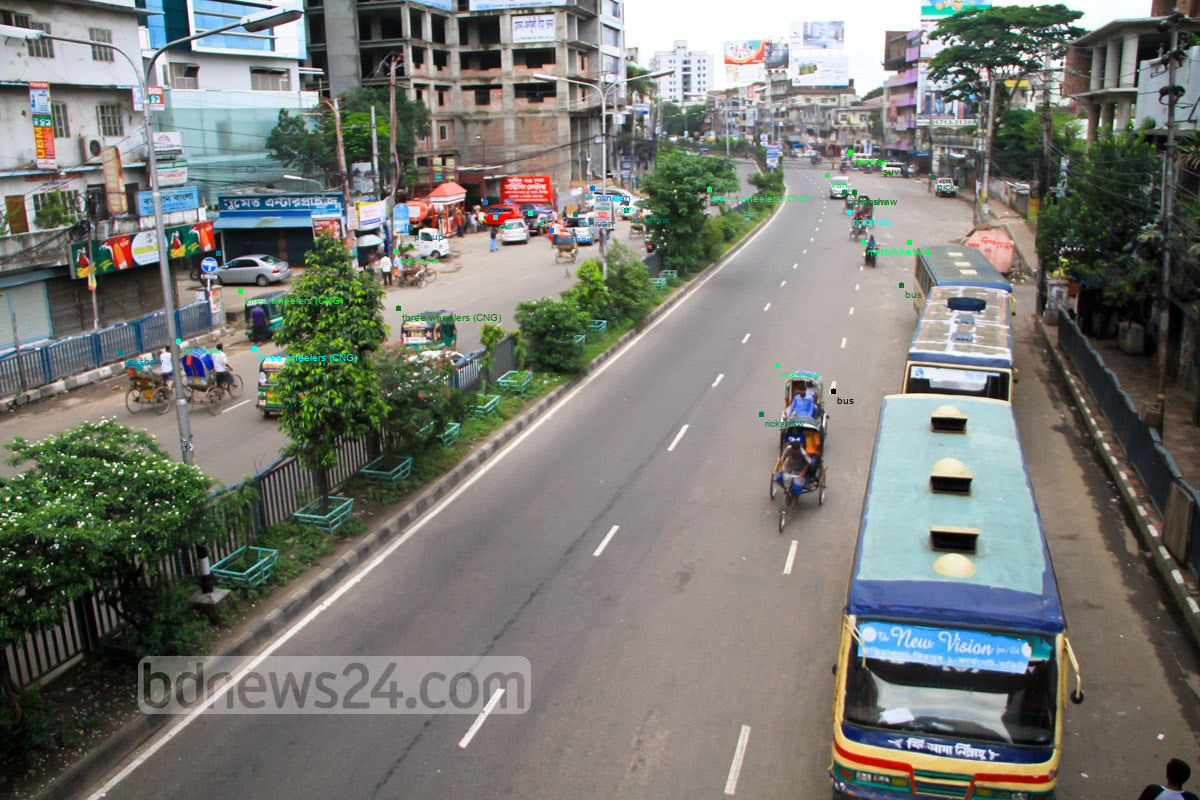

In [18]:
to_pil_image(image)

In [19]:
video_dir = Path("data_video")
video_name = "dhaka_traffic.mp4"
video_path = video_dir / video_name

print(video_path)

data_video\dhaka_traffic.mp4


In [ ]:
Video(video_path, embed=True)

In [21]:
video_capture = cv2.VideoCapture(video_path)

if not video_capture.isOpened():
    print("Error: Could not open video.")
else:
    frame_rate = video_capture.get(cv2.CAP_PROP_FPS)
    frame_count = int(video_capture.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Frame rate: {frame_rate}")
    print(f"Total number of frames: {frame_count:,}")

Frame rate: 25.0
Total number of frames: 9,333


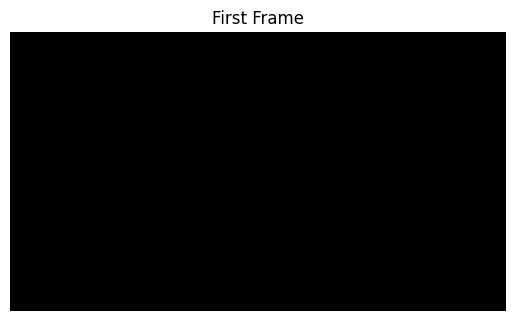

In [22]:
success, first_frame = video_capture.read()
if success:
    plt.imshow(cv2.cvtColor(first_frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

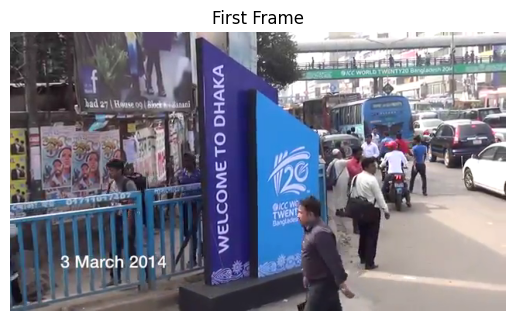

In [23]:
video_capture.set(cv2.CAP_PROP_POS_FRAMES, 100)
success, later_frame = video_capture.read()
if success:
    plt.imshow(cv2.cvtColor(later_frame, cv2.COLOR_BGR2RGB))
    plt.title("First Frame")
    plt.axis("off")
    plt.show()
else:
    print("Error: Could not read frame.")

In [24]:
frames_dir = video_dir / "extracted_frames"
frames_dir.mkdir(exist_ok=True)

In [25]:
frame_count = 0

while True:
    success, frame = video_capture.read()
    if not success:
        break

    # Save frames at the frame_rate
    if frame_count % frame_rate == 0:
        frame_path = frames_dir / f"frame_{frame_count}.jpg"
        cv2.imwrite(frame_path, frame)

    frame_count += 1

video_capture.release()

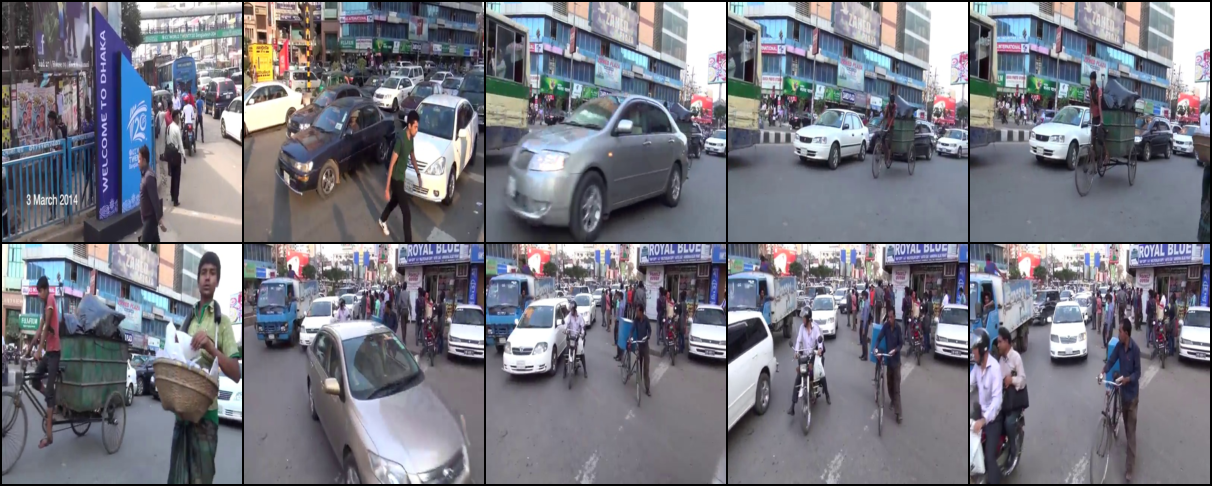

In [26]:
def display_sample_images(dir_path, sample=5):
    image_list = []
    images = sorted(dir_path.iterdir())
    if images:
        sample_images = images[:sample]
        for sample_image in sample_images:
            image = read_image(str(sample_image))
            resize_transform = transforms.Resize((240, 240))
            image = resize_transform(image)
            image_list.append(image)
    grid = make_grid(image_list, nrow=5)
    image = to_pil_image(grid)
    return image


display_sample_images(frames_dir, sample=10)